# Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Date

In [5]:
def getDay(s):
    return s.split("/")[1]

def getMonth(s):
    return s.split("/")[0]

def getYear(s):
    return s.split("/")[2]

def getYearMonth(s):
    return s.split("/")[1]+"-"+s.split("/")[2]

df['year']= df['date'].apply(lambda x: getYear(x))
df['month']= df['date'].apply(lambda x: getMonth(x))
df['day']= df['date'].apply(lambda x: getDay(x))
df['month_year']= df['date'].apply(lambda x: getYearMonth(x))

print(sorted(df['year'].unique()))
print(sorted(df['month'].unique()))
print(sorted(df['day'].unique()))
print(sorted(df['month_year'].unique()))

['2014', '2015']
['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '4', '5', '6', '7', '8', '9']
['1-2014', '1-2015', '10-2014', '10-2015', '11-2014', '11-2015', '12-2014', '12-2015', '13-2014', '13-2015', '14-2014', '14-2015', '15-2014', '15-2015', '16-2014', '16-2015', '17-2014', '17-2015', '18-2014', '18-2015', '19-2014', '19-2015', '2-2014', '2-2015', '20-2014', '20-2015', '21-2014', '21-2015', '22-2014', '22-2015', '23-2014', '23-2015', '24-2014', '24-2015', '25-2014', '25-2015', '26-2014', '26-2015', '27-2014', '27-2015', '28-2014', '28-2015', '29-2014', '29-2015', '3-2014', '3-2015', '30-2014', '30-2015', '31-2014', '31-2015', '4-2014', '4-2015', '5-2014', '5-2015', '6-2014', '6-2015', '7-2014', '7-2015', '8-2014', '8-2015', '9-2014', '9-2015']


In [6]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

## Price

In [7]:
df.agg({'price' : ['count','min', 'max', 'mean', 'median']})

,price
count,2.159700e+04
min,7.800000e+04
max,7.700000e+06
mean,5.402966e+05
median,4.500000e+05


In [8]:
"""Split into 500K bands = 11 bins"""
price_list = df['price']
price_list.describe().apply(lambda x: format(x, 'f'))
tier = []
for price in price_list:
    if price >= 10000000:
        tier.append('1M +')
    elif price >= 900000:
        tier.append('900K to 1M')
    elif price >= 800000:
        tier.append('800K to 900K')
    elif price >= 700000:
        tier.append('700K to 800K')
    elif price >= 600000:
        tier.append('600K to 700K')
    elif price >= 500000:
        tier.append('500K to 600K')
    elif price >= 400000:
        tier.append('400K to 500K')
    elif price >= 300000:
        tier.append('300K to 400K')
    elif price >= 200000:
        tier.append('200K to 300K')
    elif price >= 100000:
        tier.append('100K to 200K')
    elif price < 100000:
        tier.append('0 to 100K')

df['price_bands'] = tier
print(df['price_bands'].shape, len(tier), price_list.shape)

(21597,) 21597 (21597,)


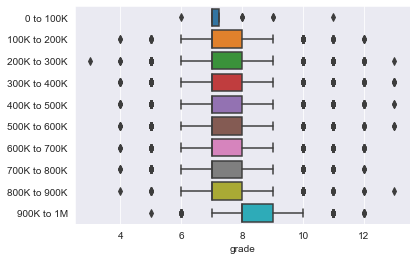

In [9]:
sns.boxplot(y=sorted(df['price_bands']), x=df['grade'])

In [10]:
"""Split into 500K bands = 11 bins, but this tim with grades"""
price_list_level = df['price']
price_list_level.describe().apply(lambda x: format(x, 'f'))
tier_value = []
for price in price_list_level:
    if price >= 10000000:
        tier_value.append(11)
    elif price >= 900000:
        tier_value.append(10)
    elif price >= 800000:
        tier_value.append(9)
    elif price >= 700000:
        tier_value.append(8)
    elif price >= 600000:
        tier_value.append(7)
    elif price >= 500000:
        tier_value.append(6)
    elif price >= 400000:
        tier_value.append(5)
    elif price >= 300000:
        tier_value.append(4)
    elif price >= 200000:
        tier_value.append(3)
    elif price >= 100000:
        tier_value.append(2)
    elif price < 100000:
        tier_value.append(1)

print(len(tier_value), price_list.shape)        
df['price_list_level'] = tier_value
print(df['price_list_level'].shape)

21597 (21597,)
(21597,)


## Bedrooms

In [11]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [12]:
df.loc[(df['bedrooms'] == 33)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,price_list_level
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,47.6878,-122.331,1330,4700,2014,6,25,25-2014,600K to 700K,7


In [13]:
df.drop([15856, 15857], inplace=True)

In [14]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

## Waterfront

In [15]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [16]:
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].unique()

array([0., 1.])

## View

In [17]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [18]:
df['view'].median()

0.0

In [19]:
df['view'] = df['view'].fillna(0)

In [20]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

## Basement

In [21]:
df.loc[(df['sqft_basement'] == "?"), ['sqft_basement']] = 0.0

## yr_built

In [22]:
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [23]:
df.loc[(df['yr_built'] == 0), ['yr_built']].count()

yr_built    0
dtype: int64

In [24]:
df['yr_built'] = df['yr_built'].astype(int)

In [25]:
type(df['yr_built'][0])

numpy.int64

## Split the year built into decade bins:

In [26]:
print(df['yr_built'].max())
print(df['yr_built'].min())

2015
1900


In [27]:
age_list = df['yr_built']
age_list.describe().apply(lambda x: format(x, 'f'))
tier = []
for year in age_list:
    if year >= 2010:
        tier.append(2010)
    elif year >= 2000:
        tier.append(2000)
    elif year >= 1990:
        tier.append(1990)
    elif year >= 1980:
        tier.append(1980)
    elif year >= 1970:
        tier.append(1970)
    elif year >= 1960:
        tier.append(1960)
    elif year >= 1950:
        tier.append(1950)
    elif year >= 1940:
        tier.append(1940)
    elif year >= 1930:
        tier.append(1930)
    elif year >= 1920:
        tier.append(1920)
    elif year >= 1910:
        tier.append(1910)
    elif year >= 1900:
        tier.append(1900)

df['yr_built_bands'] = tier
print(df['yr_built_bands'].shape, len(tier), df['yr_built'].shape)

(21595,) 21595 (21595,)


## yr_renovated

In [28]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [29]:
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [30]:
type(df['yr_renovated'][0])

numpy.int64

In [31]:
df['id'].min()

1000102

# Export to Clean CSV

In [32]:
df.to_csv ('kc_house_data_clean.csv')